## Load data

In [23]:
import pandas as pd
import json 

# log_file = "/tmp/test/head_model/history.json"
log_file = "/Users/DToma/work/classification_model/laboratory/model/head_model/history.json"
log_file2 = "/Users/DToma/work/classification_model/laboratory/model/head_model_1/history.json"
log_file3 = "/Users/DToma/work/classification_model/laboratory/model/head_model_2/history.json"

log_file4 = "/Users/DToma/work/classification_model/laboratory/model/body_model/history.json"

df = pd.read_json(log_file)
df2 = pd.read_json(log_file2)
df3 = pd.read_json(log_file3)

df['test_accuracy2'] = df2['test_accuracy'].to_list()
df['test_accuracy3'] = df3['test_accuracy'].to_list()

with open(log_file3, 'r') as f:
    data = json.load(f)
data

{'train_loss': [1.817092093933239,
  1.1916098170326592,
  1.0006916374898285,
  0.8751597926485702,
  0.7801738964968109,
  0.7094473611847143,
  0.647991948648264,
  0.6003348057375716,
  0.5602805933237225,
  0.524265422431122],
 'test_loss': [1.9293317375990393,
  1.6778758816735881,
  1.5464830027760235,
  1.4921180711331545,
  1.4684465364107218,
  1.480310574277527,
  1.4852412468034428,
  1.5083397844971675,
  1.5545812295765906,
  1.596349055314923],
 'test_accuracy': [0.6439469556537858,
  0.6706117210894054,
  0.6864394695565379,
  0.695707970911165,
  0.7068301725367175,
  0.7141023812918865,
  0.7202338514187937,
  0.7236560673035791,
  0.7219449593611864,
  0.7212319977185228],
 'learning_rate': [0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001,
  0.001]}

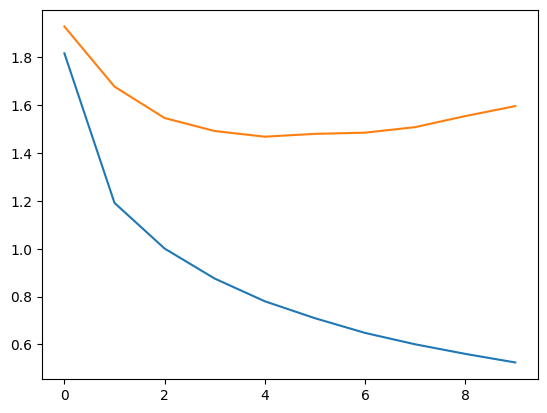

In [25]:
# plot body model loss
import matplotlib.pyplot as plt
plt.plot(data['train_loss'])
plt.plot(data['test_loss'])

## Loss

<Axes: >

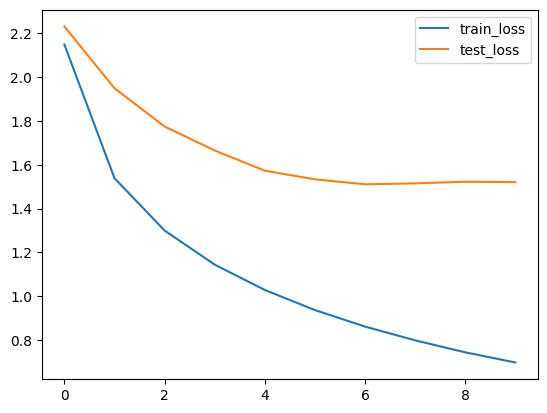

In [21]:
# plot the loss
df[['train_loss','test_loss']].plot()

## Accuracy

<Axes: >

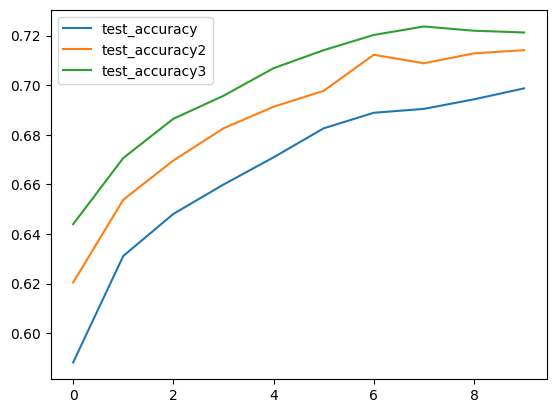

In [20]:
# plot accuracy
df[['test_accuracy','test_accuracy2','test_accuracy3']].plot()

## Learning rate

<Axes: >

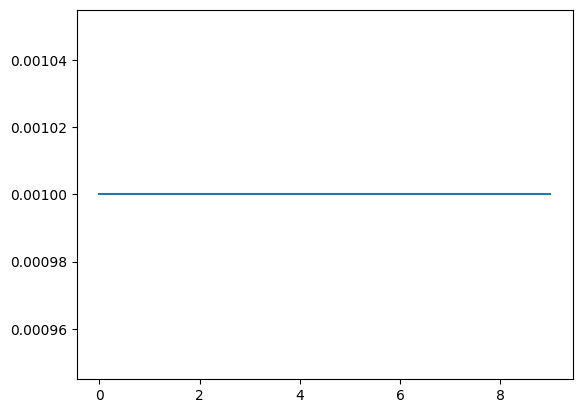

In [3]:
df['learning_rate'].plot()